# Predicting Customer Churn in SyriaTel (Telco): A Machine Learning Approach

## 1. Overview
### a). Business Understanding

SyriaTel, a company in the telecommunication industry, has approached us with a pressing challenge: high customer churn rates are leading to financial losses and decreased customer satisfaction. To combat this issue, SyriaTel aims to accurately predict which customers are likely to leave, allowing them to take proactive measures to retain them. However, traditional methods for predicting customer churn have proven to be unreliable, with high rates of false positives and false negatives.

In light of this, SyriaTel has tasked us with developing a machine learning classification model that can accurately predict customer churn based on historical usage patterns and demographic information. Our goal is to create a model that will help SyriaTel minimize financial losses and improve customer satisfaction.

> **Problem statement**: 
The telecommunication industry is facing a challenge of high customer churn rates, leading to financial losses and decreased customer satisfaction. Traditional methods for predicting customer churn have high false-positive and false-negative rates, making it difficult for companies such as SyriaTel to accurately identify which customers are at risk of leaving and take proactive measures to retain them.

> **Objectives**:
 >* The primary objective of this project is to reduce customer churn, which is the loss of customers to competitors. By predicting which customers are at risk of leaving
 >* Identify which features/predictor variables affect the attrition of customers 
 >* Build 3 Classification models and evaluate the best one for classifying and predicting the churn rate

> **Metric of Success**
The project wil be considered a success if the classification model accurately identifies a high proportion of actual churners(High Recall) with a low number of false positive predictions(Low False Positive Rate) and demonstrates good generalization performance(Accuracy of 80% on unseen dataset).


### b). Data Understanding

The dataset used was obtained from [Kaggle (Churn in Telecom's dataset)](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset) and comprises of **3333 rows and 21 columns**. All the features except the phone number and state have numerical values, with the rest being categorical or binary (international plan, voice mail plan, and churn). The churn column will be used as our target variable 

This is a binary classification problem where the goal is to predict the likelihood of a customer churning and the **churn column** will be represented by **1 - True** and **0 - False**

|Dataset Coumns|about|
|:------|------|
|State|Represents the states in the USA|
|Account length|represents the length of time (in seconds or minutes) that a customer's account has been active.|
|Area code|Geographic area code of a customer's telephone number.|
|Phone number|represents the telephone number of a customer.|
|International plan|represents whether a customer has subscribed to an international call plan or not. It can have either "Yes" or "No" values.|
|voice mail plan|represents whether a customer has subscribed to a voice mail plan or not. It can have either "Yes" or "No" values.|
|Number vmail messages|represents the number of voice mail messages left by a customer.|
|Total day minutes|represents the total amount of time (in minutes) that a customer has spent on daytime calls.|
|Total day calls|represents the total number of calls that a customer has made during the day.|
|Total day charge|represents the total charge for daytime calls made by a customer.|
|total eve minutes|represents the total amount of time (in minutes) that a customer has spent on evening calls.|
|total eve calls|represents the total number of calls that a customer has made in the evening.|
|total eve charge|represents the total charge for evening calls made by a customer.|
|total night minutes|represents the total amount of time (in minutes) that a customer has spent on night calls.|
|total night calls|represents the total number of calls that a customer has made at night.|
|total night charge|represents the total charge for night calls made by a customer.|
|total intl minutes|represents the total amount of time (in minutes) that a customer has spent on international calls.|
|total intl calls|represents the total number of international calls made by a customer.|
|total intl charge| represents the total charge for international calls made by a customer.|
|customer service calls|represents the number of customer service calls made by a customer.|
|churn|represents whether a customer has cancelled their service or not. It can have either "True" or "False" values.|

## 2. Data Preprocessing

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#sklearn preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline

# sklearn classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

from imblearn.over_sampling import SMOTE

#sklearn evaluation metrics and validation
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,roc_curve, auc
from sklearn.metrics import roc_auc_score,confusion_matrix, classification_report

Loading the Dataset

In [2]:
# loading the data from the csv file
data = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# checking size of our dataset
print(f'The shape of this dataset is: {data.shape}')

print('------\n')

# Checking missing values
display(data.info())


The shape of this dataset is: (3333, 21)
------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   floa

None

The dataset has 3333 records with 21 columns or features. These features include information about the customer's state, account length, area code, phone number, international plan, voice mail plan, and call usage details (minutes and charges) for different time periods (day, evening, night, international). The last column, "churn", is the target variable indicating whether the customer has churned or not. All the features except the phone number and state have numerical values, with the rest being categorical or binary (international plan, voice mail plan, and churn). The data does not contain any missing values.

In [4]:
#checking for unique values in the dataset
data.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [5]:
# dropping Mobile Number
data.drop('phone number',axis = 1,inplace = True)
data

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [6]:
# descriptive summary statistics of the dataset's distribution 
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## 3. External Data Source Validation

The Telecommunication industry continues to face a major and costly challenge in the form of customer churn. A recent research study conducted in 2018 by [Analysis Mason](https://www.analysysmason.com/globalassets/x_migrated-media/media/analysys_mason_ssa_mobile_satisfaction_sample_jun2018_rdmm03.pdf), a consulting and research company, highlights this issue. The study, titled **"Connected Consumer 2017: Mobile Customer Satisfaction and Churn in Sub-Saharan Africa**," was led by senior analyst Karim Yaici and research director Stephen Sale.

According to the study, the intention to churn among telecommunication subscribers in the sub-Saharan African region ranged from **9% to 16% across all operators surveyed**. This figure is in line with churn rates in other regions, but lower compared to the neighboring Middle East and Africa (MENA) region, where the intention to churn within 6 months was recorded at an average of 22%.

The study also found that customer service had a significant impact on churn for subscribers in South Africa, where the average churn rate was 17%. This effect was much greater compared to the other countries covered, which may reflect the differences in market maturity in the region. The findings from this study serve as external validation for the importance of customer service in reducing churn in the telecommunication industry.

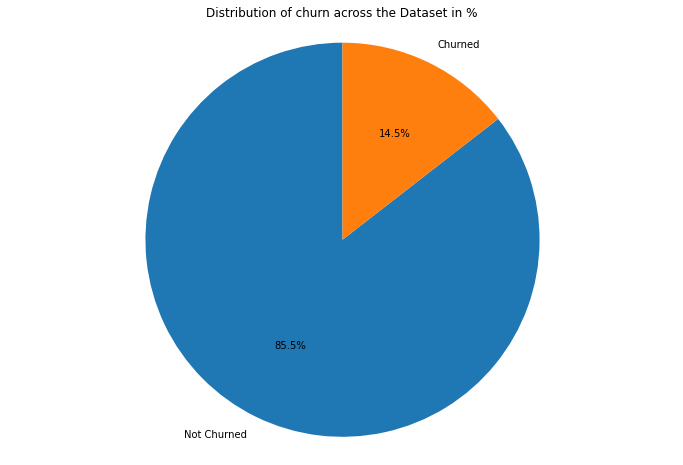

In [7]:
counts = data['churn'].value_counts()

plt.figure(figsize =(12,8))
plt.pie(counts, labels=['Not Churned', 'Churned'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of churn across the Dataset in %')
plt.show()

## 4. Exploratory Data Analysis (EDA)

### a). Univariate Analysis

#### What are the frequencies of different categorical values in the Telecom Churn Dataset?

<Figure size 864x720 with 0 Axes>

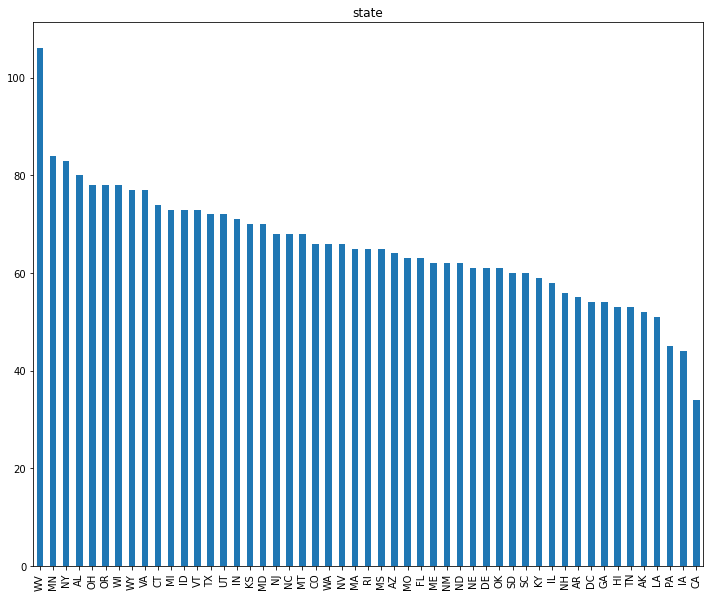

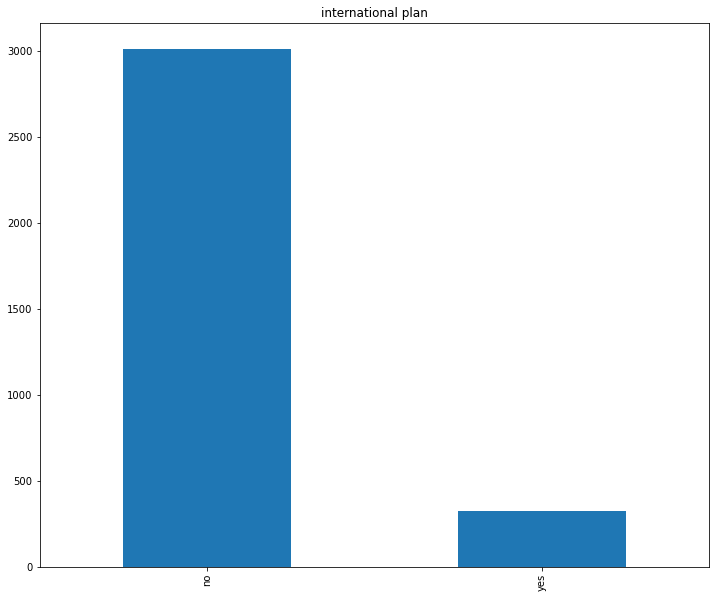

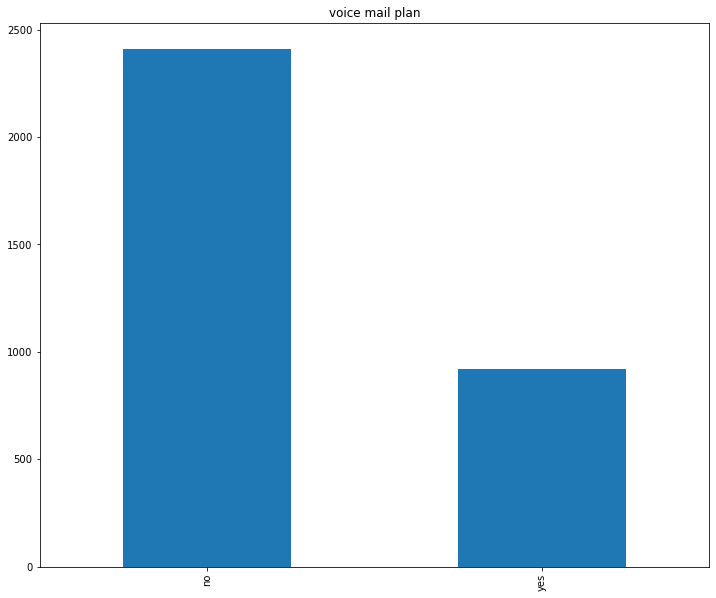

In [8]:
# Displaying various columns
plt.figure(figsize =(12,10))
for column in data.columns:
    if data[column].dtype == 'object':
        plt.figure(figsize =(12,10))
        data[column].value_counts().plot(kind='bar')
        plt.title(column)
        plt.show()


### Top 10 States with the highest churn rate

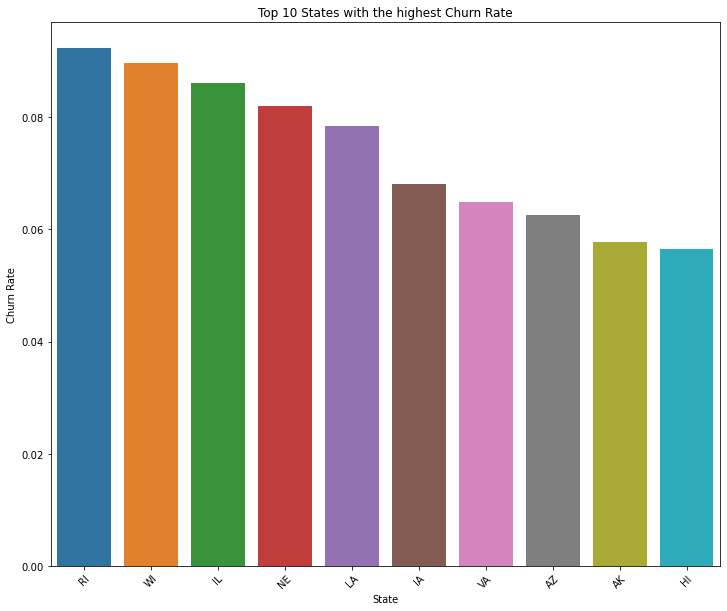

In [9]:
def plot_top_states(data, highest=True):
    plt.figure(figsize =(12,10))
    
    # Group data by state and compute the mean churn rate
    grouped = data.groupby('state').mean()
    grouped = grouped.sort_values(by='churn', ascending=(not highest))
    
    if highest:
        top_10 = grouped.tail(10)
    else:
        top_10 = grouped.head(10)
    
    sns.barplot(x=top_10.index, y=top_10.churn)
    plt.xlabel('State')
    plt.ylabel('Churn Rate')
    if highest:
        plt.title('Top 10 States with the highest Churn Rate')
    else:
        plt.title('Top 10 States with the lowest Churn Rate')
    plt.xticks(rotation=45)
    plt.show()

plot_top_states(data, highest=True)

### Top 10 States with the lowest churn rate

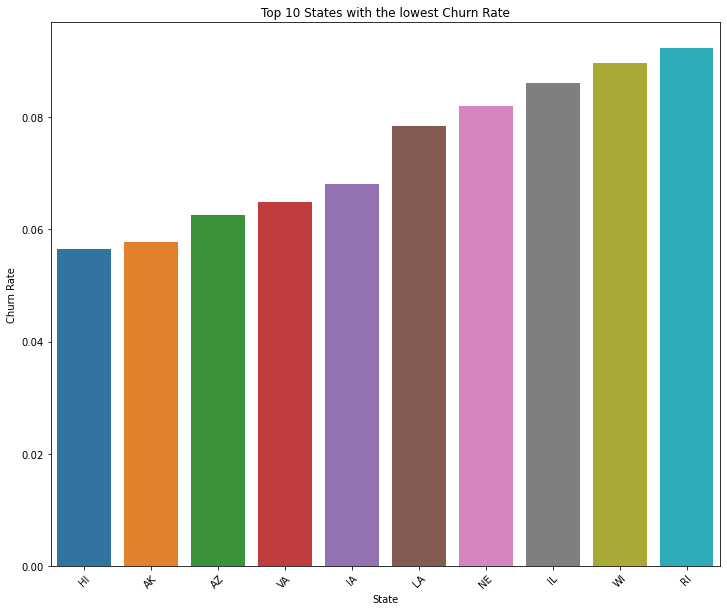

In [10]:
plot_top_states(data, highest=False)

#### What is the churn rate of customers at SyriaTel and what is the distribution of churned and non-churned customers in the dataset?

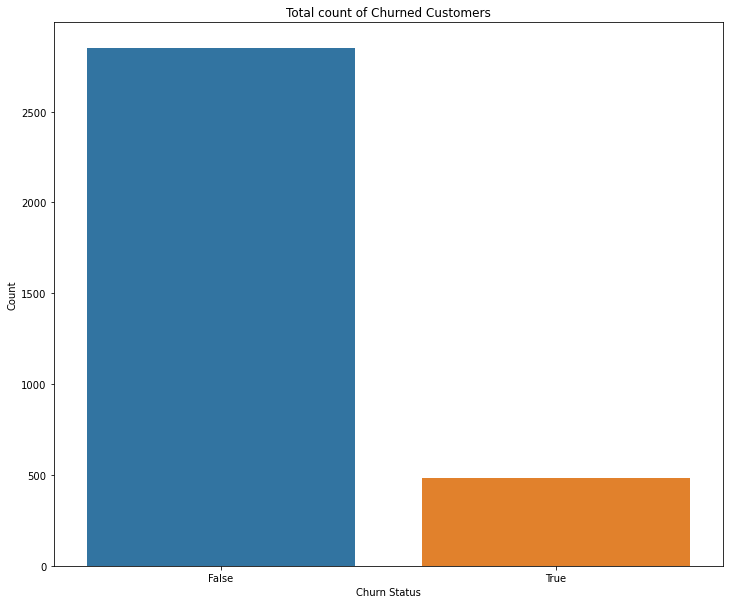

Churn rate at SyriaTel stands at: 14.49 %


In [11]:
plt.figure(figsize =(12,10))

attrition = data['churn'].value_counts()
sns.barplot(attrition.index, attrition.values)
plt.title('Total count of Churned Customers')
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.show()

churn = sum(data['churn'] == True) # count of customers who churned
total = len(data['churn']) # Total number of customers
churn_rate = (churn/total) *100

print('Churn rate at SyriaTel stands at:', round(churn_rate, 2), '%')

In [12]:
from scipy.stats import shapiro

# conducting a test to measure the level of confidence 
# that the sample data comes from a normal distribution
predictor = data.drop('churn',axis = 1)
float_columns = predictor.select_dtypes(include=['float64','int64'])

# Shapiro-Wilk test
stat, p = shapiro(float_columns)

if p > 0.05:
    print("The sample data is likely to have come from a normal distribution.")
else:
    print("The sample data is likely not to have come from a normal distribution.")

The sample data is likely not to have come from a normal distribution.


#### What is the distribution of the numerical columns in the telecom churn prediction dataset and how do they impact the likelihood of churn?

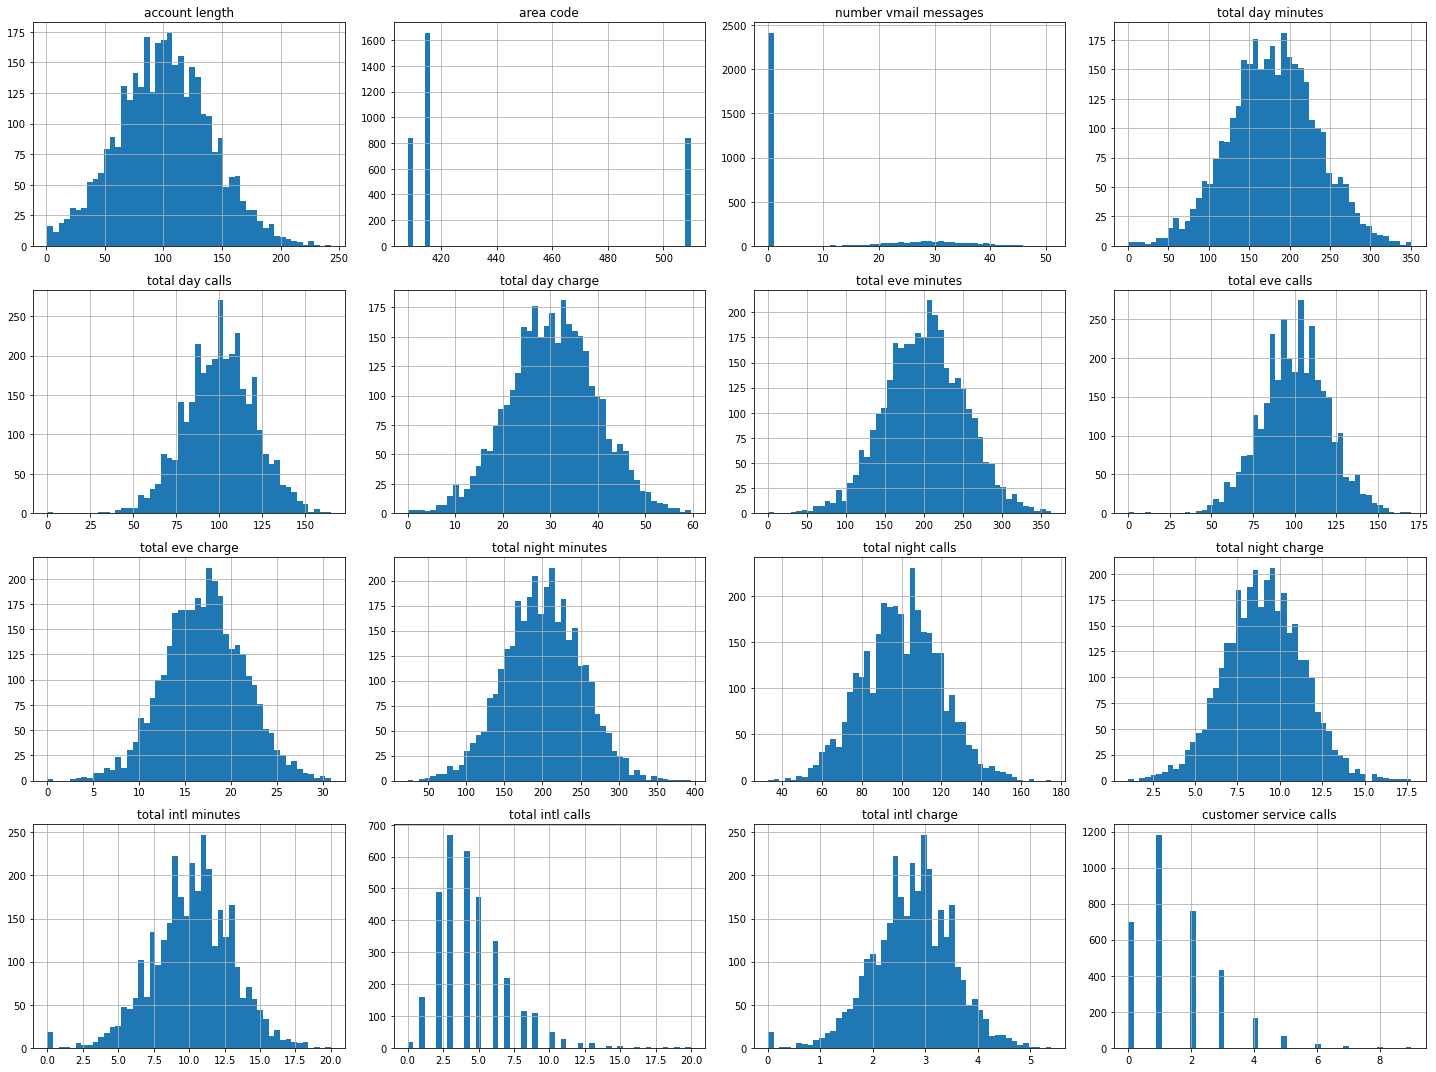

In [13]:
# Histograms for all numerical columns in the dataset 
predictor.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

## 5. Feature Engineering

In [14]:
# Checking Categorical predictors/features 
display(data['area code'].value_counts())
display(data['international plan'].value_counts())
display(data['voice mail plan'].value_counts())

415    1655
510     840
408     838
Name: area code, dtype: int64

no     3010
yes     323
Name: international plan, dtype: int64

no     2411
yes     922
Name: voice mail plan, dtype: int64

In [15]:
# Converting the non-numerical labels into numerical
label_encoder = LabelEncoder()

data['area code'] = label_encoder.fit_transform(data['area code'])
data['international plan'] = label_encoder.fit_transform(data['international plan'])
data['voice mail plan'] = label_encoder.fit_transform(data['voice mail plan'])

# convert true and false values for churn
data['churn'] = label_encoder.fit_transform(data['churn'])

# Display the first 5 rows of the dataset
data.head(2)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0
1,OH,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0


- The area codes **415, 510 and 408** are represented by **1, 2 and 0 respectively**
- International plans **no and yes** are represented by **0 and 1 respectively**
- Voice mail plans **no and yes** are represented by **0 and 1 respectively**

In [16]:
data['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

### b). Bivariate Analysis

#### Area code with the highest churn rate

 We have 3 area codes 408,415,510 represented as 0,1,2 respectively


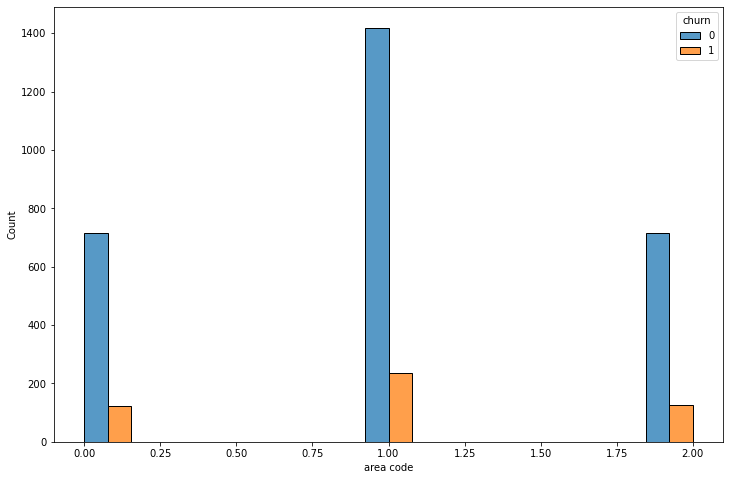

In [17]:
# Churn by area codes
plt.figure(figsize = (12,8))
sns.histplot(data=data,x='area code', hue='churn',multiple='dodge');
print(' We have 3 area codes 408,415,510 represented as 0,1,2 respectively')

Area code 415 represented as 1 has the highest retention rate compared to the rest

In [18]:
# area code with the highest churn rate
grouped = data.groupby('area code').mean()
highest_churn_area_code = grouped['churn'].idxmax()

print('The area code with the highest churn rate is:', highest_churn_area_code)

The area code with the highest churn rate is: 2


#### What is the relationship between various continuous features in the telecom churn dataset and how do they contribute to the prediction of churn?

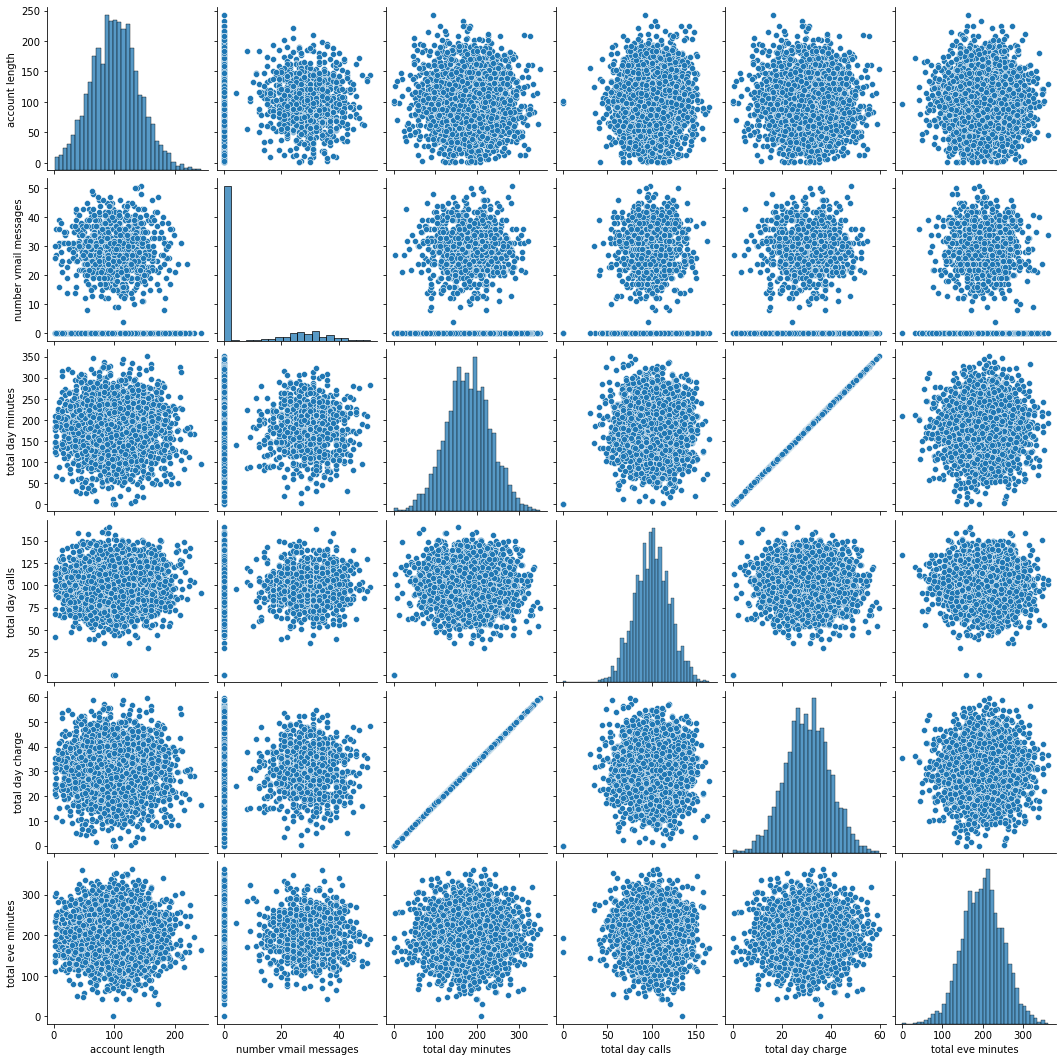

In [19]:
continous_cols = ['account length','number vmail messages','total day minutes',
                 'total day calls','total day charge','total eve minutes',
                  'total night minutes','total night charge','total intl minutes',
                  'total intl charge','customer service calls','churn']

# Plot pairwise relationships in a dataset
sns.pairplot(data=data[continous_cols[0:6]]);

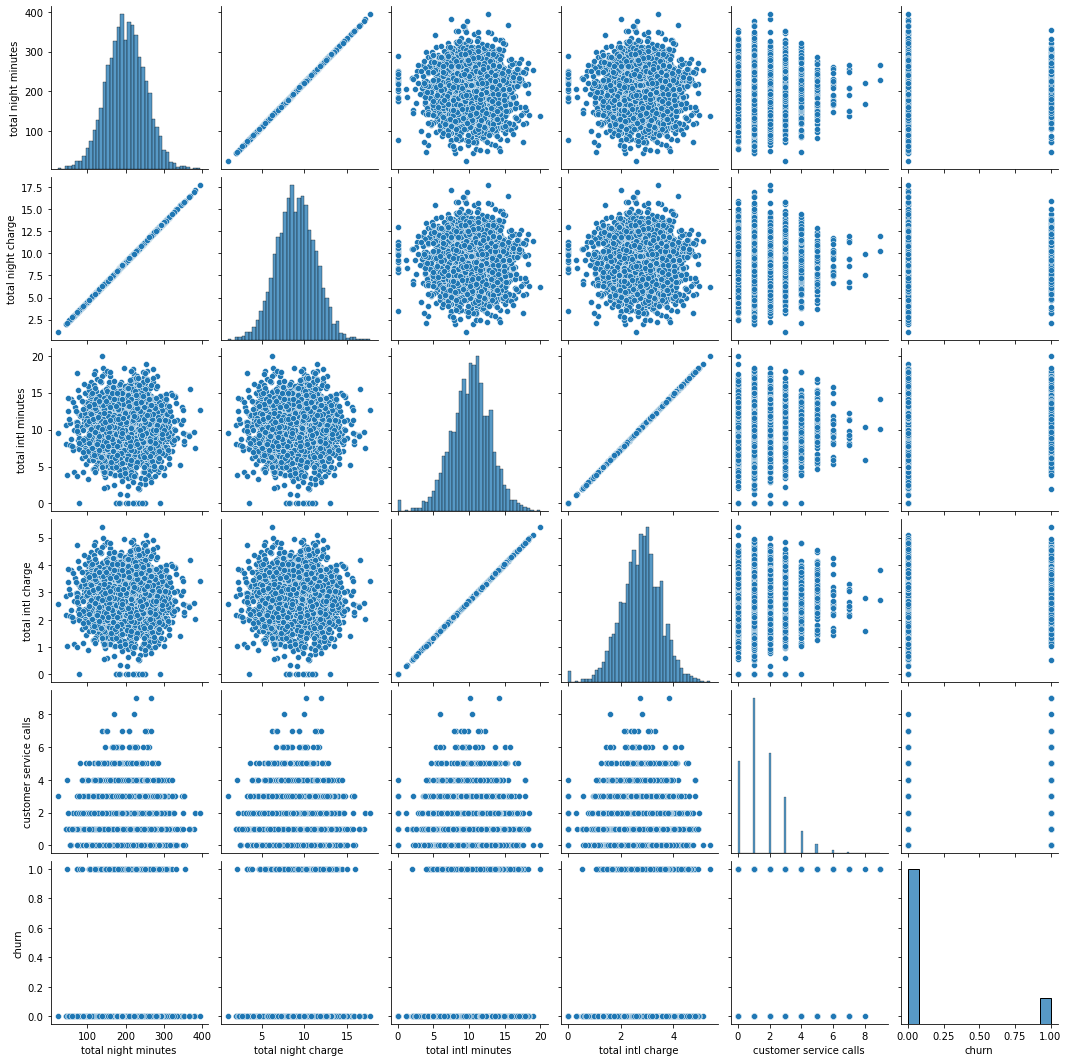

In [20]:
sns.pairplot(data=data[continous_cols[6:]]);

#### Are customers subscribed to a voice mail plan likely to churn?

In [21]:
# Function to take different plans
def plot_churn_vs_plan(data, plan_column):
    data.groupby([plan_column, 'churn']).size().unstack().plot(
        kind='bar', stacked=True, figsize=(12,8))
    plt.show()
    
    # selecting the plan(either international or voice mail plan)
    plan = sum(data[plan_column] == 1)
    total = len(data[plan_column])
    total_plan = (plan / total) * 100

    print('Customers subscribed to the {} : {:.2f}%'.format(plan_column, total_plan))

    # Calculate churned with plan subscribed to
    plan_churn = data[(data['churn'] == True) & (data[plan_column] == 1)]
    total_customers_with_plan = sum(data[plan_column] == 1)
    churned_with_plan = len(plan_churn)
    percentage_churned_with_plan = 100 * churned_with_plan / total_customers_with_plan

    print('Percentage of subscribed customers who churned with {} : {:.2f}%'.format
          (plan_column, percentage_churned_with_plan))

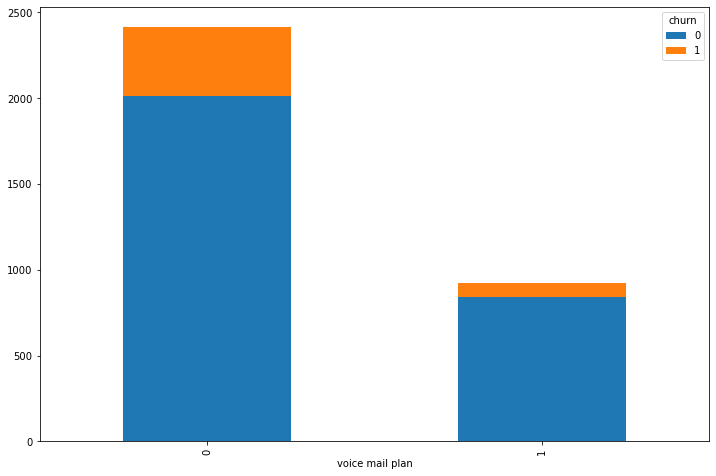

Customers subscribed to the voice mail plan : 27.66%
Percentage of subscribed customers who churned with voice mail plan : 8.68%


In [22]:
# voice mail plan
plot_churn_vs_plan(data,'voice mail plan')

#### Are customers subscribed to a International plan likely to churn?

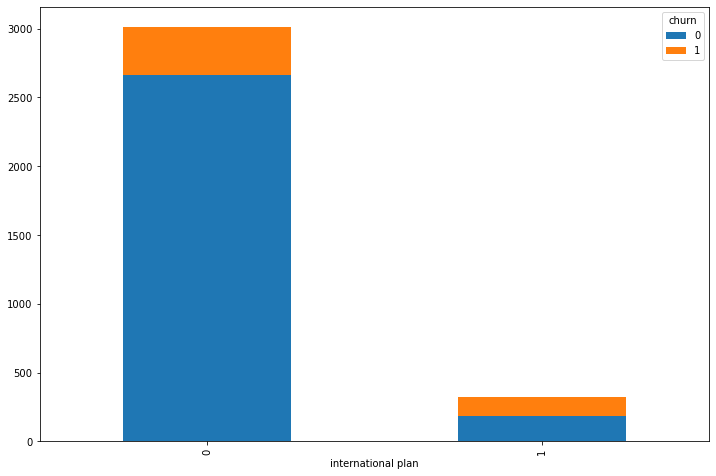

Customers subscribed to the international plan : 9.69%
Percentage of subscribed customers who churned with international plan : 42.41%


In [23]:
plot_churn_vs_plan(data,'international plan')

## 6. Modeling
### Feature Selection

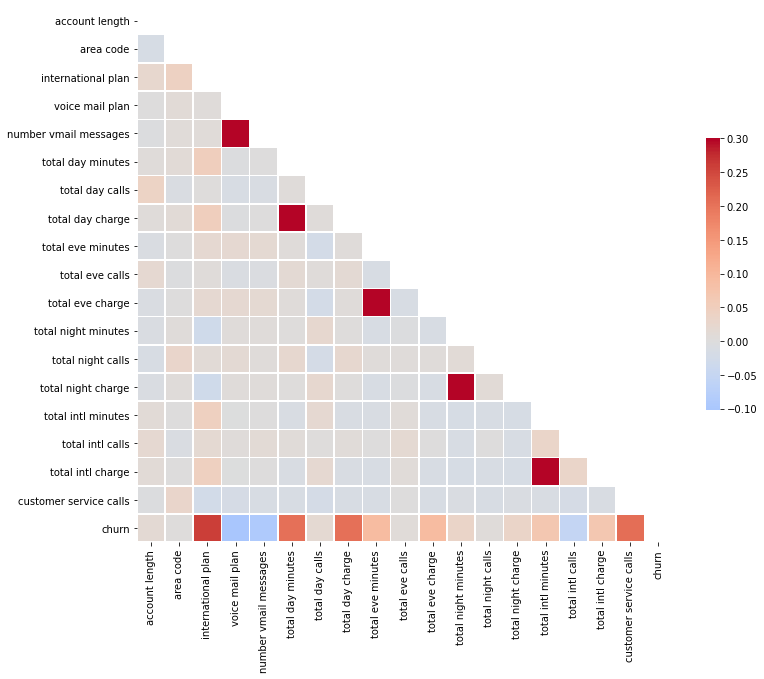

In [24]:
# Checking for correlation
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={'shrink': .5})

plt.show()

In [25]:
#dropping these columns
frenzy_data = data
frenzy_data.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [26]:
# droping the state column
frenzy_data.drop('state',axis = 1,inplace=True)

In [27]:
frenzy_data.shape

(3333, 19)

###  a). Splitting the data into Train and Test sets

since our dataset contains 3,333 observations will split the dataset to have a test size of 20% and a random state of 42

In [28]:
y = frenzy_data['churn']
X = frenzy_data.drop('churn',axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

#### Standardizing and Dealing with class imbalances

In [29]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

# convert X_train and X_test_scaled into dataframe
X_train_scaled = pd.DataFrame(X_train_scaled,index=X_train.index, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,index=X_test.index, columns=X_test.columns)


In [30]:
# Dealing with class imbalance
smote = SMOTE()
X_train_resampled,y_train_resampled = smote.fit_resample(X_train_scaled,y_train)

### b). Train the models part 1
> *  Logistic regression classifier model
> * Adaboost Classifier model
> * Gradient Boosting classifier model

In [31]:
# Logistic regression Classifier predictions
logreg = LogisticRegression(fit_intercept = False, C = 1e10, solver ='liblinear')
logreg.fit(X_train_resampled,y_train_resampled)
logreg_train_preds = logreg.predict(X_train_resampled)
logreg_test_preds = logreg.predict(X_test_scaled)

# AdaBoost model predictions
adaboost_clf = AdaBoostClassifier(random_state = 42)
adaboost_clf.fit(X_train_resampled,y_train_resampled)
adaboost_test_preds = adaboost_clf.predict(X_test_scaled)

# GradientBoosting model predictions
gbt_clf = GradientBoostingClassifier(random_state = 42)
gbt_clf.fit(X_train_resampled,y_train_resampled)
gbt_clf_train_preds = gbt_clf.predict(X_train_resampled)
gbt_clf_test_preds = gbt_clf.predict(X_test_scaled)

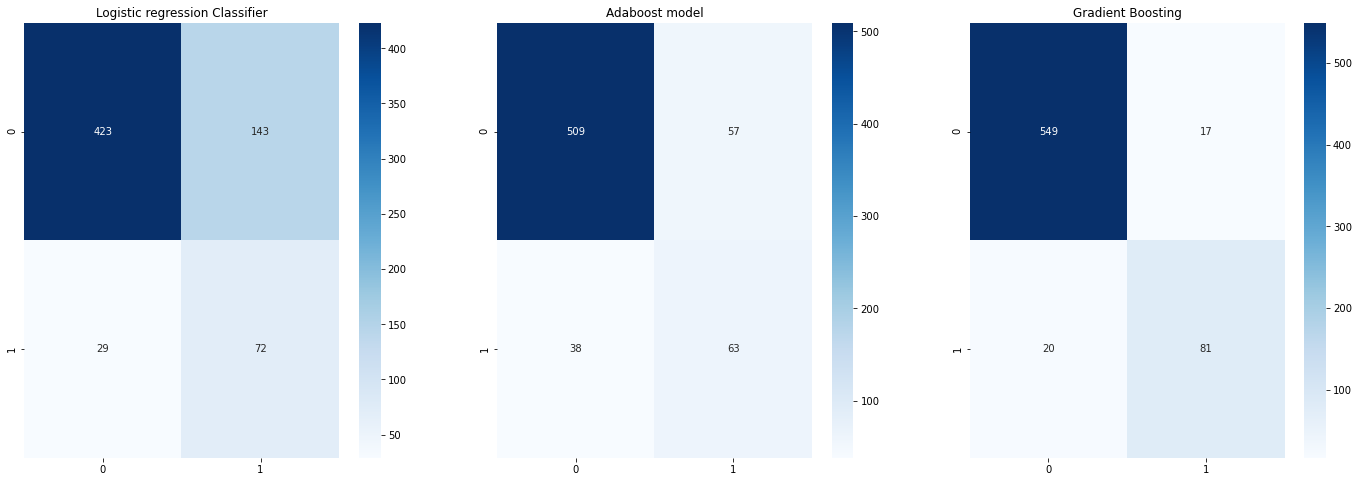

In [32]:
# Calculate the confusion matrix for the logistic regression classifier model
cm1 = confusion_matrix(y_test, logreg.predict(X_test_scaled))

# Calculate the confusion matrix for the Decision Tree model
cm2 = confusion_matrix(y_test, adaboost_clf.predict(X_test_scaled))

# Calculate the confusion matrix for the Gradient Boosting model
cm3 = confusion_matrix(y_test, gbt_clf.predict(X_test_scaled))

# Create subplots for confusion matrices
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))

# Plot confusion matrix for logistic regression
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Logistic regression Classifier')

# Plot confusion matrix for Decision Tree
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title('Adaboost model')

# Plot confusion matrix for Gradient Boosting
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', ax=ax3)
ax3.set_title("Gradient Boosting")

plt.show()


### i). Logistic regression Model metrics
 (Baseline Vanilla Model) 

In [33]:
# Display metrics of our 3 models
def display_metrics(true, preds):
    
    print(f'Accuracy: {accuracy_score(true, preds)}')
    print(f'F1-Score: {f1_score(true, preds)}')
    print(f'Recall: {recall_score(true,preds)}')

# Logistic Regression Model Metrics (Vanilla)
print('Logistic Regression\n')
print('----\n')
display_metrics(y_test, logreg_test_preds)

Logistic Regression

----

Accuracy: 0.7421289355322339
F1-Score: 0.4556962025316455
Recall: 0.7128712871287128


### ii). Adaboost model metrics

In [34]:
print('Adaboost Model\n')
print('----\n')
display_metrics(y_test, adaboost_test_preds)

Adaboost Model

----

Accuracy: 0.8575712143928036
F1-Score: 0.5701357466063348
Recall: 0.6237623762376238


### iii). Gradient Boosting model metrics

In [35]:
print('Gradient Boosting Model\n')
print('----\n')
display_metrics(y_test, gbt_clf_test_preds)

Gradient Boosting Model

----

Accuracy: 0.9445277361319341
F1-Score: 0.814070351758794
Recall: 0.801980198019802


### c). Train the models part 2
> * K-Nearest neighbors model
> * Decision Tree Model
> * Random Forest Classifier


In [36]:
# K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_resampled, y_train_resampled)
y_pred_knn = knn.predict(X_test_scaled)

# Decision Tree model
dt = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 5, min_samples_split=10, random_state = 42)
dt.fit(X_train_resampled, y_train_resampled)
y_pred_dt = dt.predict(X_test_scaled)


# Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf.predict(X_test_scaled)

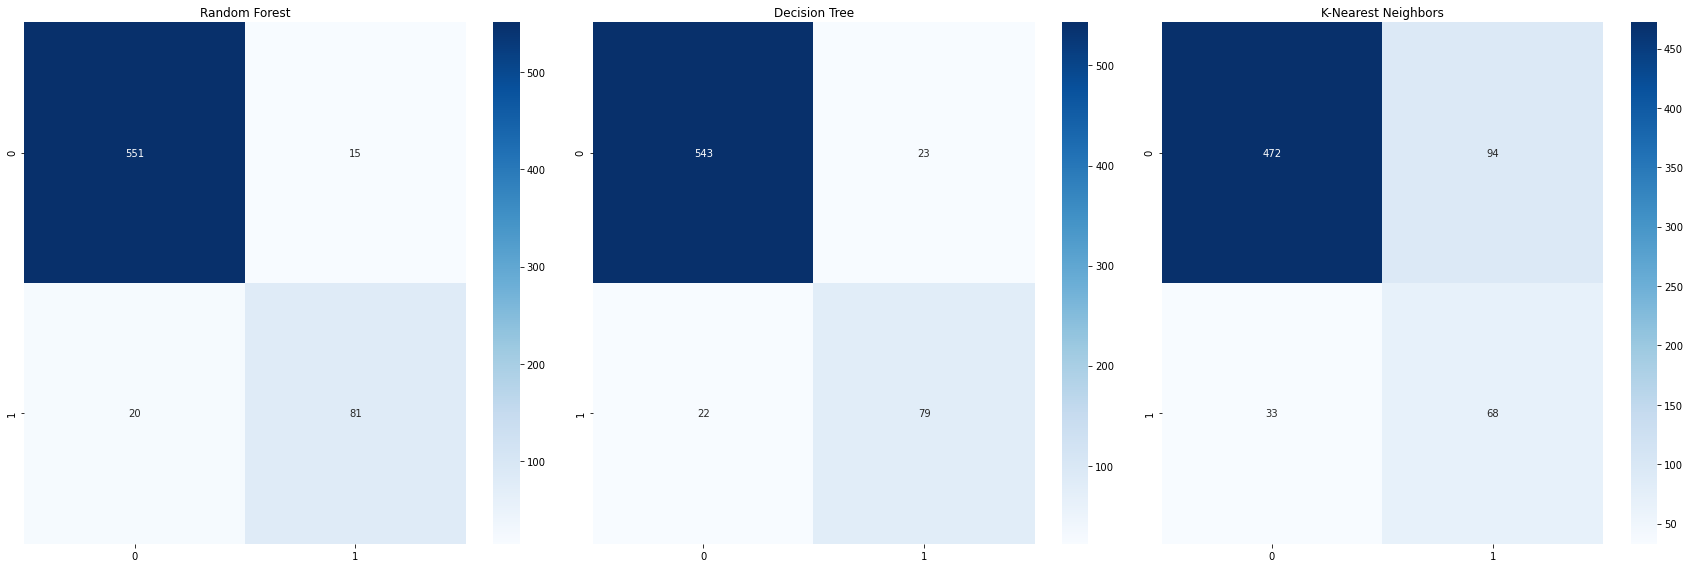

In [37]:
# Calculate the confusion matrix for the Random Forest model
cm1 = confusion_matrix(y_test, rf.predict(X_test_scaled))

# Calculate the confusion matrix for the Decision Tree model
cm2 = confusion_matrix(y_test, dt.predict(X_test_scaled))

# Calculate the confusion matrix for the K-Nearest Neighbors model
cm3 = confusion_matrix(y_test, knn.predict(X_test_scaled))

# Create subplots for confusion matrices
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))

# Plot confusion matrix for Random Forest
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title("Random Forest")

# Plot confusion matrix for Decision Tree
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title("Decision Tree")

# Plot confusion matrix for K-Nearest Neighbors
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', ax=ax3)
ax3.set_title("K-Nearest Neighbors")

plt.tight_layout()
plt.show()

### i). Random Forest Model

In [38]:
print('Random Forest Model\n')
print('----\n')
display_metrics(y_test,y_pred_rf)

Random Forest Model

----

Accuracy: 0.9475262368815592
F1-Score: 0.8223350253807107
Recall: 0.801980198019802


### ii). Decision Tree Model

In [39]:
print('Decision Tree Model\n')
print('----\n')
display_metrics(y_test,y_pred_dt)

Decision Tree Model

----

Accuracy: 0.9325337331334332
F1-Score: 0.7783251231527093
Recall: 0.7821782178217822


### iii). K-Nearest Neighbor Model

In [40]:
print('K-Nearest Neighbors classifier Model\n')
print('----\n')
display_metrics(y_test,y_pred_knn)

K-Nearest Neighbors classifier Model

----

Accuracy: 0.8095952023988006
F1-Score: 0.5171102661596959
Recall: 0.6732673267326733


### d). Evaluating Our best 3 models (Decision Tree, Random Forest & Gradient Boosting)

In [41]:
# classification report of Decision Tree
dt_classification_report = classification_report(y_test, y_pred_dt)
print(dt_classification_report)

# calculate the 5-fold cross-validated score 
print('Mean Random Forest Cross-Val Score (k=5):')
print(cross_val_score(dt, X, y, cv=5).mean())

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       566
           1       0.77      0.78      0.78       101

    accuracy                           0.93       667
   macro avg       0.87      0.87      0.87       667
weighted avg       0.93      0.93      0.93       667

Mean Random Forest Cross-Val Score (k=5):
0.9336953145049097


In [42]:
# classification report of Random Forest
rf_classification_report = classification_report(y_test, y_pred_rf)
print(rf_classification_report)

# calculate the 5-fold cross-validated score 
print('Mean Random Forest Cross-Val Score (k=5):')
print(cross_val_score(rf, X, y, cv=5).mean())

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       566
           1       0.84      0.80      0.82       101

    accuracy                           0.95       667
   macro avg       0.90      0.89      0.90       667
weighted avg       0.95      0.95      0.95       667

Mean Random Forest Cross-Val Score (k=5):
0.9549972761367066


The accuracy of the model is 0.94, meaning that the model correctly predicted 94% of the test sample in the data. A recall of 0.79 for class 1 means that the model was able to find 79% of all positive(churn) test predictions.

In [43]:
# classification report of Gradient boosting
gradientBoost_classification_report = classification_report(y_test, gbt_clf_test_preds)
print(gradientBoost_classification_report)

# calculate the 5-fold cross-validated score 
print('Mean Gradient Boosting Cross-Val Score (k=5):')
print(cross_val_score(gbt_clf, X, y, cv=5).mean())

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       566
           1       0.83      0.80      0.81       101

    accuracy                           0.94       667
   macro avg       0.90      0.89      0.89       667
weighted avg       0.94      0.94      0.94       667

Mean Gradient Boosting Cross-Val Score (k=5):
0.9534980257618939


The accuracy of the model is 0.95, meaning that the model correctly predicted 95% of the test sample in the data. A recall of 0.81 for class 1 means that the model was able to find 81% of all positive(churn) test predictions.

## 7. Evaluation of our Final Model

### Hyperparameter tuning (Decision tree model)


In [44]:
# Tuning a Random Forest model
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

dt_grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', return_train_score=True)

# Fit the GridSearchCV to training data 
dt_grid_search.fit(X_train_resampled, y_train_resampled)

# best set of hyperparameters
best_hyperparams = dt_grid_search.best_params_
best_hyperparams

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [45]:
# Mean training score
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(X_test_scaled, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")

Mean Training Score: 87.52%
Mean Test Score: 90.10%
Best Parameter Combination Found During Grid Search:


The accuracy of the model improved on the training set but decreased on the test set. This may indicate overfitting, as the model has learned the training data too well and therefore may not generalize well to new, unseen data. The F1-score and recall values on the test set are also lower than the training set, which further supports this notion. To address overfitting, one can try to increase the size of the training set or try other methods like early stopping or regularization. Additionally, further hyperparameter tuning may be necessary to improve the model's performance on the test set.

### Hyperparameter tuning (Random Forest model)

In [46]:
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, return_train_score=True)

# refit train data
rf_grid_search.fit(X_train_resampled, y_train_resampled)
y_pred_rftuned = rf_grid_search.predict(X_test_scaled)
best_params = rf_grid_search.best_params_
best_params

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 100}

In [47]:
# Mean training score
rf_grid_training_score = np.mean(rf_grid_search.cv_results_['mean_train_score'])

# Mean test score
rf_grid_testing_score = rf_grid_search.score(X_test_scaled, y_test)

print(f"Mean Training Score: {rf_grid_training_score :.2%}")
print(f"Mean Test Score: {rf_grid_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")

Mean Training Score: 91.40%
Mean Test Score: 94.60%
Best Parameter Combination Found During Grid Search:


### Comapring the two Tuned Models

In [48]:
dt_score = dt_grid_search.score(X_test_scaled, y_test)
rf_score = rf_grid_search.score(X_test_scaled, y_test)

print('Tuned Decision tree grid search: ', dt_score)
print('Tuned Random forest grid search: ', rf_score)

Tuned Decision tree grid search:  0.9010494752623688
Tuned Random forest grid search:  0.9460269865067467


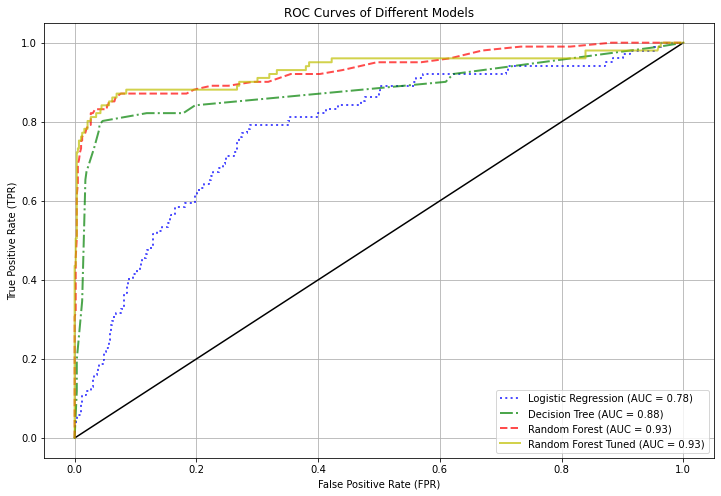

In [49]:
# predictions on the test set using each model
y_pred_prob_lr = logreg.predict_proba(X_test_scaled)[:,1]
y_pred_prob_dt = dt.predict_proba(X_test_scaled)[:,1]
y_pred_prob_rf = rf.predict_proba(X_test_scaled)[:,1]
y_pred_rfTuned = rf_grid_search.predict_proba(X_test_scaled)[:,1]

# false positive rate (FPR) and true positive rate (TPR) for each model
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob_lr)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_prob_dt)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
fpr_rfTuned, tpr_rfTuned, thresholds_rfTuned = roc_curve(y_test, y_pred_rfTuned)

#area under the ROC curve (AUC) for each model
auc_lr = roc_auc_score(y_test, y_pred_prob_lr)
auc_dt = roc_auc_score(y_test, y_pred_prob_dt)
auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
auc_rfTuned = roc_auc_score(y_test, y_pred_rfTuned)

fig = plt.figure(figsize = (12,8))
plt.plot([0,1],[0,1], 'k')
plt.plot(fpr_lr, tpr_lr, 'b', label='Logistic Regression (AUC = %0.2f)'% auc_lr, lw=2, alpha=0.7, linestyle=":")
plt.plot(fpr_dt, tpr_dt, 'g', label='Decision Tree (AUC = %0.2f)'% auc_dt, lw=2, alpha=0.7, linestyle="-.")
plt.plot(fpr_rf, tpr_rf, 'r', label='Random Forest (AUC = %0.2f)'% auc_rf, lw=2, alpha=0.7, linestyle="--")
plt.plot(fpr_rfTuned, tpr_rfTuned, 'y', label='Random Forest Tuned (AUC = %0.2f)'% auc_rfTuned, lw=2, alpha=0.7, linestyle="-")

plt.title("ROC Curves of Different Models")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")

plt.grid()
plt.show()

Based on our ROC curve we can conclude that both the Random forest and tuned random forest models are our best model since they have an AUC of 0.93 and they are hugging the top left side of our graph, they also have a high recall of around 0.82 when predicting a customer will churn as compared to the other models

### Feature importance of our Random Classifier

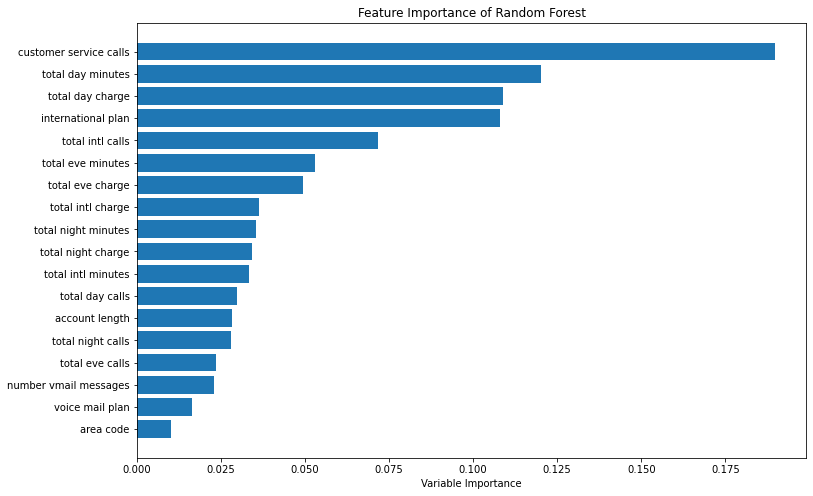

In [50]:
importance = rf.feature_importances_
sorted_index = np.argsort(importance)

# plot the feature importance
plt.figure(figsize =(12,8))
plt.barh(range(X_train_resampled.shape[1]), importance[sorted_index])
plt.yticks(range(X_train_resampled.shape[1]), X_train_resampled.columns[sorted_index])
plt.xlabel("Variable Importance")
plt.title("Feature Importance of Random Forest")
plt.show()


### saving our model into a pickle file

In [51]:
# open the file for writing
pic_out = open('picklefile','wb')

#write model into picklefile
pickle.dump(rf_grid_search,pic_out)

## 8. Conclusion

In conclusion, the results of the mean random forest cross-validation score (k=5) on predicting the churn rate showed an accuracy of 0.95, with a weighted average of 0.95. The precision, recall, and f1-score for class 0 (not churned) were 0.97, 0.97, and 0.97, respectively. For class 1 (churned), the precision, recall, and f1-score were 0.82, 0.82, and 0.82, respectively. The macro average and weighted average for precision, recall, and f1-score were 0.89 and 0.95, respectively.

These results indicate that the random forest model performed well in terms of accuracy, with a high weighted average for precision, recall, and f1-score. The model's performance in predicting class 0 (not churned) was slightly better compared to class 1 (churned), with a higher precision, recall, and f1-score. Overall, the random forest model was considered the best model for predicting the churn rate.

## 9. Recommendations and future improvement ideas

The company should consider implementing this ideas to improve the model (Reduce churning):
 * Feature Engineering:
     * It's possible to enhance the prediction of churn by creating new features from the existing data. For example, a feature for the average daily or monthly charge, a feature for the average call duration or a feature for the region covered instead of many states could be generated. These new features could offer deeper insights into customer behavior and contribute to a better prediction of churn.
 * Data collection:
    * Undertake a customer satisfaction survey to collect info on how the customers rate Network Coverage and Quality, customer service and improve on these areas
    * Collect personal customer data such as Age,Gender and Marital status which may enable the company to create custom plans to cater for this groups

* Offering competitive pricing and packages: Customers are more likely to switch to another provider if they feel that they are not getting good value for their money.

* Offering loyalty programs: Offering incentives and rewards for customers who stay with the provider for a longer period of time can reduce churn
